# Моделирование двухпроводной линии передачи, нагруженной на комплексное сопротивлениею.
### Вариант 12.
Выполнить моделирование работы двухпроводной линии передачи в Jupyter Notebook.
Основные подключаемые библиотеки: numpy (для работы с массивами) и matplotlib.pyplot (для вывода графиков).

***Постановка задачи:***  Пусть линия с волновым сопротивлением W нагружена на активное сопротивление Rн (или реактивное сопротивление Хн). Нарисовать графики эпюр распределения амплитуд напряжения и тока вдоль линии.
Волновое сопротивление двухпроводной линии рассчитать по формуле W=276 lg(D/r), где D=20 мм - расстояние между центрами проводов линии, r=1 мм - радиус провода линии.  
**Rн=132**  
**Хн=-196**

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
N=1001
lmd = 1 
Rn = 132
Xn = -196
Zn = Rn + Xn*1j 
Un=1 
D=20*10**(-3)
r=1*10**(-3)

*Расчитаем волновое сопротивление:*

In [16]:
def W (D,r):
    return 276*np.log10(D/r)
print('W =', W (D,r), "[Ом]")

W = 359.0842788032588 [Ом]


In [17]:
z=np.zeros(N)
dz=2/(N-1)*lmd
for i in range (N):
    z[i]+=i*dz

In [18]:
def U(z):
    return Un*np.cos(2*np.pi/lmd*z)+Un/Zn*W(D,r)*np.sin(2*np.pi/lmd*z)*1j
def I(z):
     return Un/Zn*np.cos(2*np.pi/lmd*z)+Un/W(D,r)*np.sin(2*np.pi/lmd*z)*1j
    

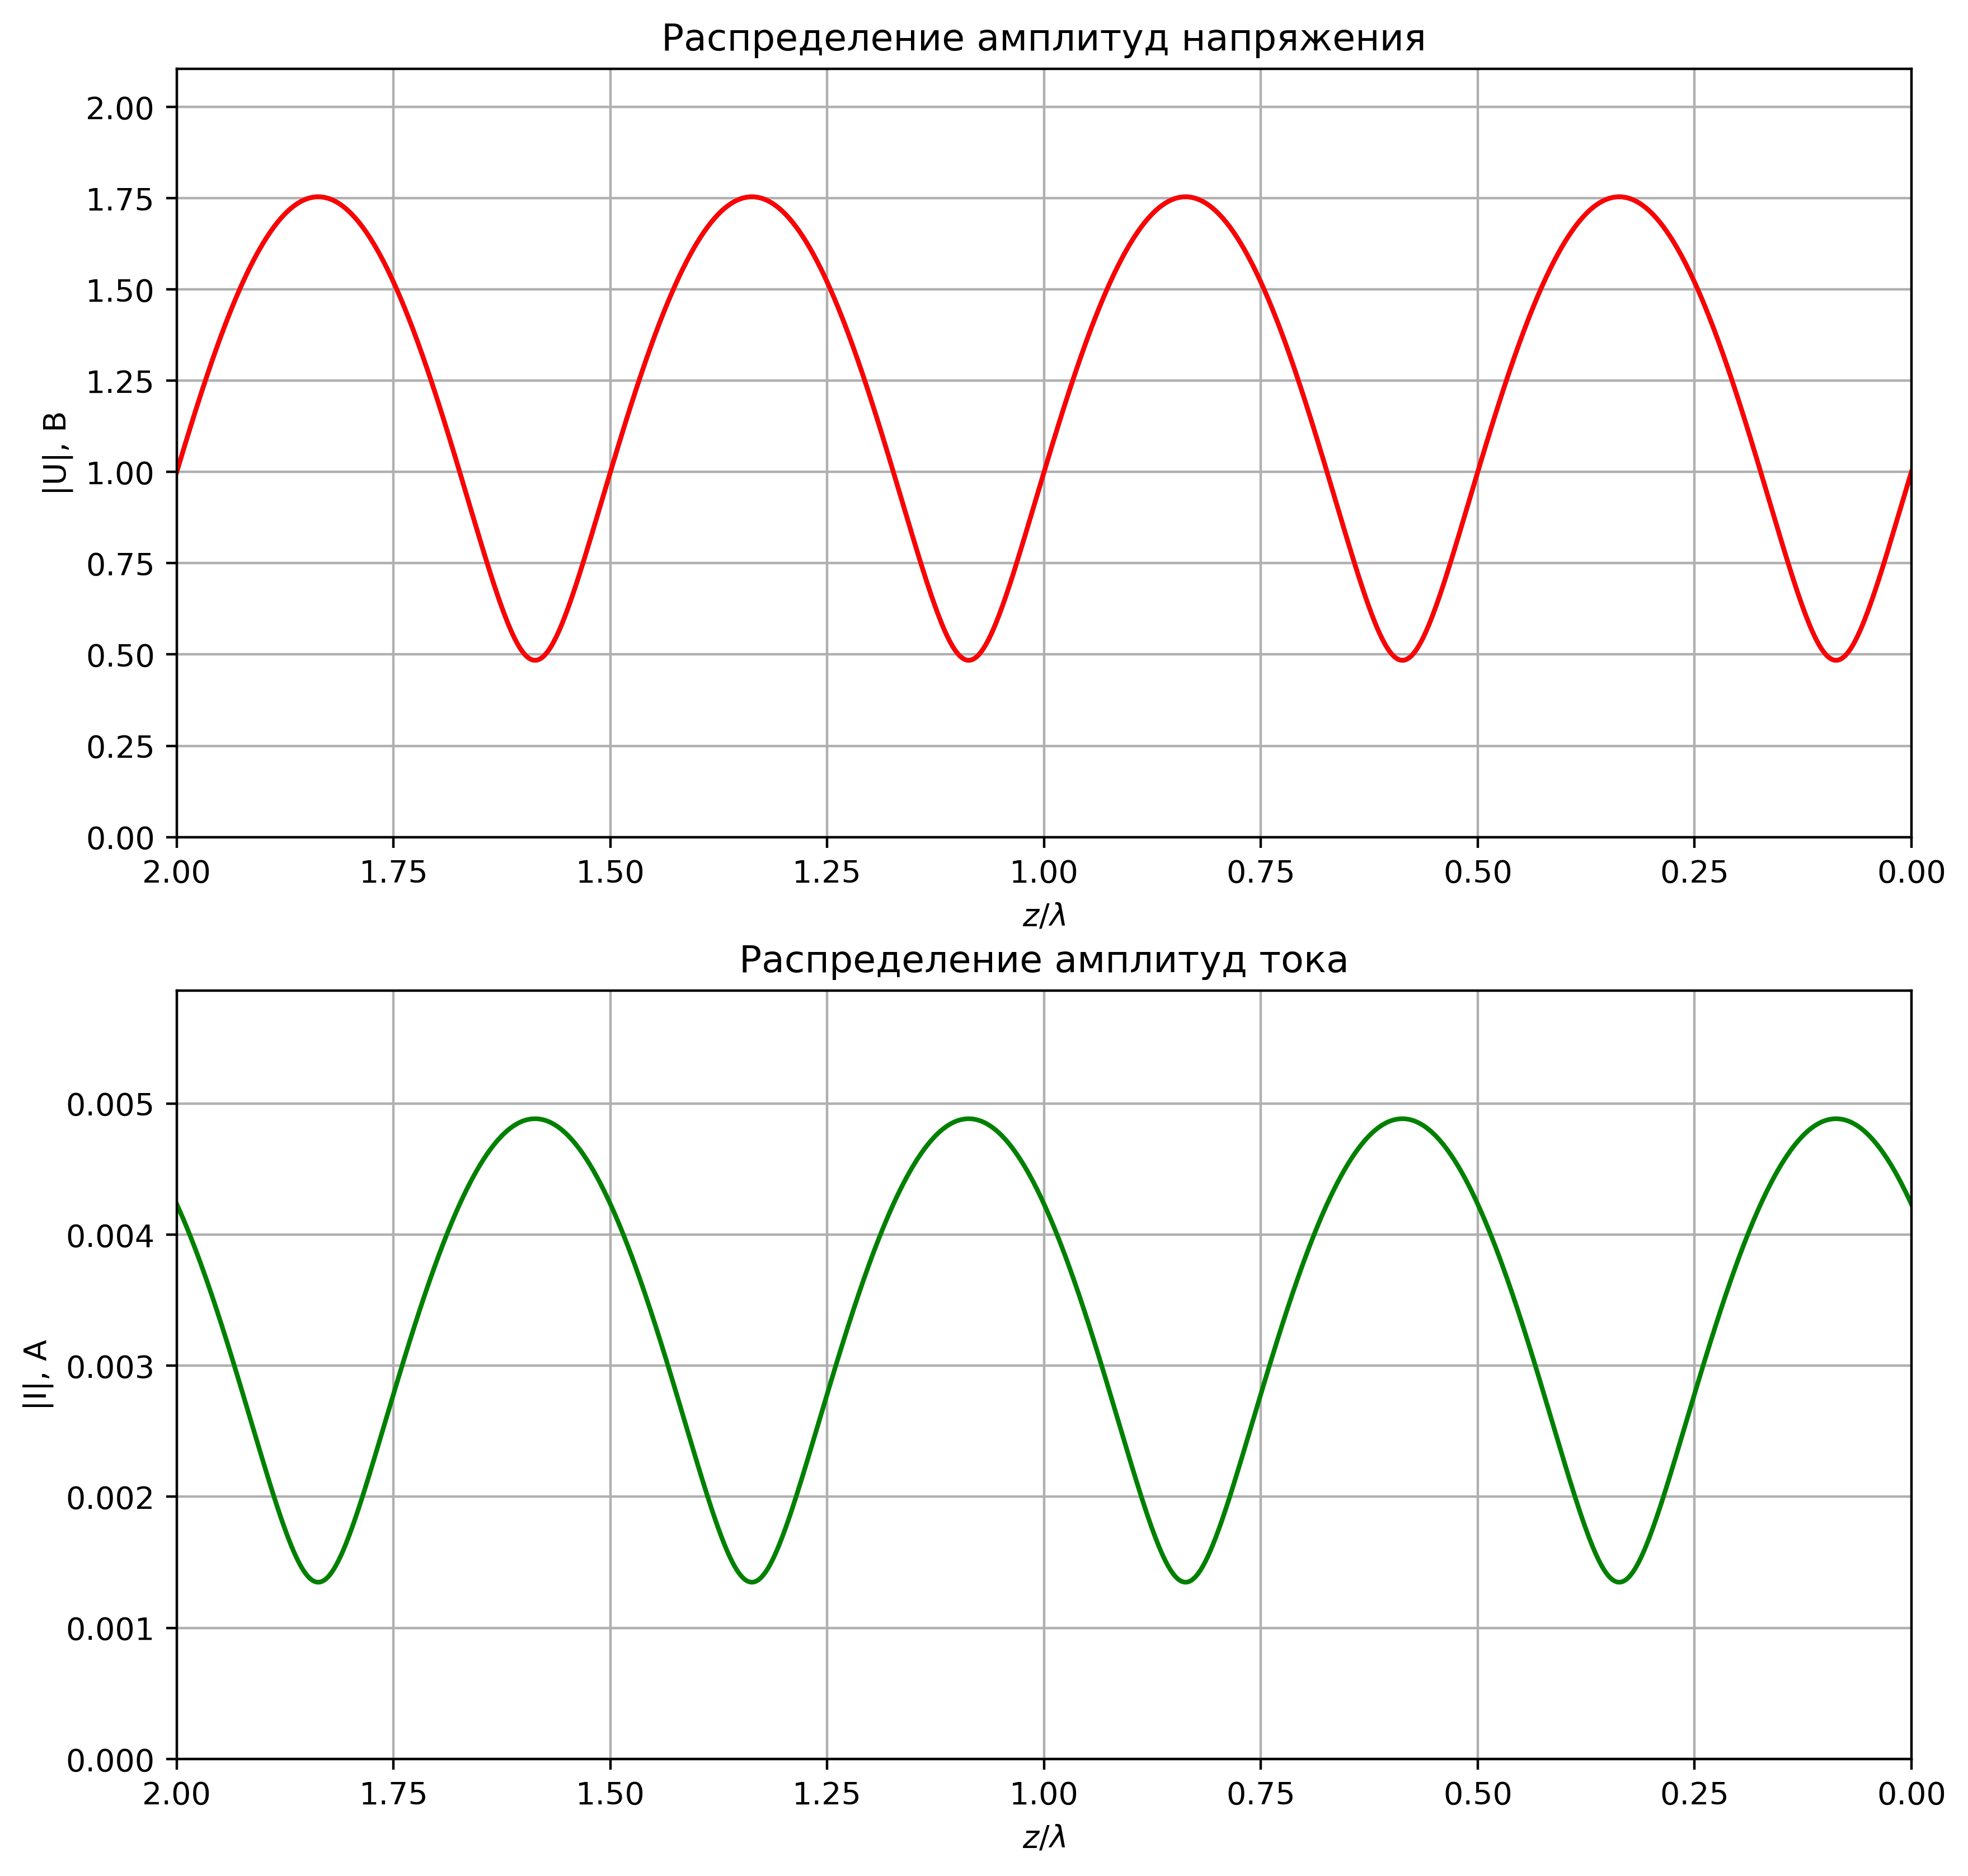

In [29]:
fig1, ax = plt.subplots(2,1,figsize=(10, 10), dpi=400)

ax[0].plot(z,abs(U(z)))
ax[0].grid()
ax[0].set_xlim([2,0])
ax[0].set_ylim([0, 1.2*max(abs(U(z)))])
ax[1].set_ylim([0, 1.2*max(abs(I(z)))])
ax[0].set_xlabel('$z/\lambda$')
ax[0].set_ylabel('|U|, B')
ax[0].set_title("Распределение амплитуд напряжения")
ax[1].set_title("Распределение амплитуд тока")
ax[1].plot(z, abs(I(z)),'g')
ax[1].grid()
ax[1].set_xlim([2,0])
ax[1].set_xlabel("$z/\lambda$")
ax[1].set_ylabel('|I|, А')
ax[0].plot(z, abs(U(z)),'r')

*Расчитаем КБВ, КСВ и коэффициент отражения:*


In [20]:
G=(Zn-W(D,r))/(Zn+W(D,r))
Ksv=(1+abs(G))/(1-abs(G))
Kbv=1/Ksv
print("Кбв =",Kbv,"Ксв =",Ksv,
     "|Г| =",abs(G))

Кбв = 0.27606368415747673 Ксв = 3.622352585244656 |Г| = 0.5673198954176832


*Расчитаем КБВ и КСВ по минимальному и максимальному значению напряжения:*

In [21]:
print("Кбв =",min(abs(U(z)))/max(abs(U(z))),"Ксв =",max(abs(U(z)))/min(abs(U(z))))

Кбв = 0.2761191063327391 Ксв = 3.6216255125603065
